# CIS 5450 Homework 2: SQL
## Due: Wednesday, October 11 2023, 10:00 pm EST
### Worth 100 points in total (90 Points Autograded + 10 Points Manually Graded)

Welcome to Homework 2! By now, you should be familiar with the world of data science and the Pandas library. This assignment focuses on helping you get to grips with a new tool: SQL.

Through this homework, we will be working with SQL (specifically **pandasql**) by exploring a [Yelp](https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset/versions/6) dataset containing business, checkin, tip, and user data. We will also conduct some text analysis.

 <!-- We will finish off the homework with some text analysis. -->

We are introducing a lot of new things in this homework, and this is often where students start to get lost. Thus, we **strongly** encourage you to review the slides/material as you work through this assignment.

**Before you begin:**
- Be sure to click "Copy to Drive" to make sure you're working on your own personal version of the homework
- Check the **pinned FAQ post** on Ed for updates! If you have been stuck, chances are other students have also faced similar problems.
- **WARNING:** You MUST check that your notebook displays ALL visualizations on the Gradescope preview AND verify that the autograder finishes running and gives you your expected score (not a 0). (Ed [#251](https://edstem.org/us/courses/44790/discussion/3426442)).
  - **Penalty:** -10: if we have to resubmit your notebook to Gradescope for you after the deadline. (e.g. not naming your files correctly, not submitting `.py` and .`ipynb`, etc.).
  - **Penalty:** -5: failing to restart and re-run your notebook and ensure that that all visualizations show up in the Gradescope preview of your `.ipynb` (see step 1 and 2 in screenshot below for how to check this) (e.g. `Large File Hidden Error`).
  - **Note:** If your plot is not run or not present after we open your notebook, we will deduct the entire manually graded point value of the plot. (e.g. if your plot is worth 4 points, we will deduct 4 points).
  - **Note:** If your `.py` file is hidden because it's too large, that's ok! We only care about your `.ipynb` file.



## Part 0: Libraries and Set Up Jargon (The usual wall of imports)

In [ ]:
%set_env HW_ID=CIS5450_F23_HW2

env: HW_ID=CIS5450_F23_HW2


In [ ]:
%%capture
!pip install penngrader-client

In [ ]:
!pip install sqlalchemy==1.4.46
!pip install pandasql
!pip install geopy
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.21
    Uninstalling SQLAlchemy-2.0.21:
      Successfully uninstalled SQLAlchemy-2.0.21
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.46 which is incompatible.
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=f62691b3f00bf1e97a867693cc6c5bdef528e4290a98f9dc7987190c0e662c52
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.0 MB/s eta 0:00:00


In [ ]:
from penngrader.grader import *
import pandas as pd
import datetime as dt
import geopy.distance as gp
import matplotlib.image as mpimg
import plotly.express as px
import pandasql as ps #SQL on Pandas Dataframe
import nltk
nltk.download('punkt')

from wordcloud import WordCloud
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
import math
import re
import json
import os
from collections import Counter
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Five datasets we're using
! wget -nc https://storage.googleapis.com/penn-cis5450/yelp_business.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/yelp_checkin.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/yelp_tip.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/yelp_user.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/hotel_reviews.csv

--2023-10-03 20:00:57--  https://storage.googleapis.com/penn-cis5450/yelp_business.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31760674 (30M) [text/csv]
Saving to: ‘yelp_business.csv’

yelp_business.csv   100%[===================>]  30.29M   120MB/s    in 0.3s    

2023-10-03 20:00:57 (120 MB/s) - ‘yelp_business.csv’ saved [31760674/31760674]

--2023-10-03 20:00:57--  https://storage.googleapis.com/penn-cis5450/yelp_checkin.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135964892 (130M) [text/csv]
Saving to: ‘yelp_checkin.csv’

yelp_checkin.

In [ ]:
print(pd.__version__ )

1.5.3


### PennGrader Setup

In [ ]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY.
# IF NOT, THE AUTOGRADER WON'T KNOW WHO TO ASSIGN POINTS TO YOU IN OUR BACKEND
# TODO: YOUR PENN-ID GOES HERE AS AN INTEGER
STUDENT_ID = 48580633

# You should also update this to a unique "secret" just for this homework, to
# authenticate this is YOUR submission
SECRET = STUDENT_ID

Leave this cell as-is...

In [ ]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Writing notebook-config.yaml


In [ ]:
grader = PennGrader('notebook-config.yaml', os.environ['HW_ID'], STUDENT_ID, SECRET)

PennGrader initialized with Student ID: 48580633

Make sure this correct or we will not be able to store your grade


# Yelp Dataset

<br>
<center><img src = "https://static-prod.adweek.com/wp-content/uploads/2021/08/YelpLogoAugust2021.jpg" width= "500" align ="center"/></center>
<br>



I'm sure you have used Yelp when searching for good restaurants or reliable local services, and with good reason. In this homework, we'll explore Yelp's extensive datasets to gain valuable insights into businesses and users on the platform. The data we will be using includes:

* Business: data about businesses listed on Yelp
* Check-in: data about check-ins made on businesses
* Tip: data about tips that users left for each business
* User: data about each user on Yelp including friends and number of reviews

We'll be parsing this data into dataframes and relations, and then exploring how to query and assemble the tables into results. We will primarily be using PandaSQL, but for some of the initial questions, we will ask you to perform the same operations in Pandas as well, so as to familiarize you with the differences and similarities of the two.

For the final part of this homework, we'll perform some text analysis on a hotel review dataset.

## Part 1: Load & Process our Datasets [12 points total]

Before we get into the data, we first need to load and clean our datasets.

# Metadata
You'll be working with four CSV files:
- `yelp_business.csv`
- `yelp_checkin.csv`
- `yelp_tip.csv`
- `yelp_user.csv`

The file `yelp_business.csv` contains data of businesses listed on Yelp such as name, address, stars, review count, etc.

The file `yelp_checkin.csv` contains check-in data for businesses including day, hour, and number of people.

The file `yelp_tip.csv` contains tips that each user left for each business.

The file `yelp_user.csv` contains data of each user such as name, review count, friends, start date of membership, and etc.


**TODO**:
* Load `yelp_business.csv` and save the data to a dataframe called `business_df`.
* Load `yelp_checkin.csv` and save the data to a dataframe called `checkin_df`.
* Load `yelp_tip.csv` and save the data to a dataframe called `tip_df`.
* Load `yelp_user.csv` and save the data to a dataframe called `user_df`.


In [ ]:
business_df = pd.read_csv('yelp_business.csv')
checkin_df = pd.read_csv('yelp_checkin.csv')
tip_df = pd.read_csv('yelp_tip.csv')
user_df = pd.read_csv('yelp_user.csv')

In [ ]:
# TODO: view business_df (just the first 5 rows with .head() is fine) to make sure the import was successful
business_df.head()

In [ ]:
# TODO: view checkin_df (just the first 5 rows with .head() is fine) to make sure the import was successful
checkin_df.head()

In [ ]:
# TODO: view tip_df (just the first 5 rows with .head() is fine) to make sure the import was successful
tip_df.head()

In [ ]:
# TODO: view user_df (just the first 5 rows with .head() is fine) to make sure the import was successful
user_df.head()

### 1.1 Data Preprocessing

Next, we are going to want to clean up our dataframes. We will start with cleaning up `business_df`.

#### 1.1.1 Cleaning `business_df` [4 points]

`.info()` gives us meaningful information regarding columns, their types, and the amount of nulls, based on which we can now clean our dataframe.

Perform these steps and save results on a new dataframe: `business_cleaned_df`

**TODO**:
* Copy `business_df` to the new dataframe called `business_cleaned_df`
* Remove extra quotation marks from the entries in the columns `name` and `address` in `business_cleaned_df`
* Convert the column `categories` into a list of strings
* Drop `neighborhood` column from `business_cleaned_df`
* Create a column called `is_restaurant` where the value is 1 if `'Restaurants'` is in the list in column `categories` and is 0 otherwise
* Create individual rows for each category of each business instead of having a list of categories (Hint: explode)
* Sort `business_cleaned_df` by `business_id` and `categories` respectively in an ascending order and reset index as well as drop old indices
* Create a list called `business_category_list` containing all unique values found in column `categories` and sort the list in an alphabetical order

After performing these steps, `business_cleaned_df` should have the following schema:

**Final Schema**:
>business_id | name | address | city | state | postal_code | latitude | longitude | stars | review_count | is_open | categories | is_restaurant
>--- | --- | --- |--- | --- | --- | --- |--- | --- | --- |--- |--- |---

### **NOTES: MAKE SURE TO ALWAYS RESET INDEX. OTHERWISE, YOU MIGHT GET AN INTERNAL SERVER ERROR WHEN RUNNING THE TEST CASES!!!**

In [ ]:
# View info of business_df
business_df.info()

In [ ]:
# TODO: Save business_df to business_cleaned_df
business_cleaned_df = business_df.copy()

In [ ]:
# TODO: Remove extra quotations from name and address
business_cleaned_df['name'] = business_cleaned_df['name'].str.replace('"', '')
business_cleaned_df['address'] = business_cleaned_df['address'].str.replace('"', '')

In [ ]:
# TODO: Convert categories into a list of strings
business_cleaned_df['categories'] = business_cleaned_df['categories'].str.split(';')

In [ ]:
# TODO: Drop neighborhood column
business_cleaned_df.drop(columns=['neighborhood'], inplace=True)

In [ ]:
# TODO: Create a column called is_restaurant where the value is 1 if 'Restaurants' is within the list in the column categories and is 0 otherwise
business_cleaned_df['is_restaurant'] = business_cleaned_df['categories'].apply(lambda x: 1 if 'Restaurants' in x else 0)

In [ ]:
# TODO: Create individual rows for each category of each business (Hint: explode)
business_cleaned_df = business_cleaned_df.explode('categories')

In [ ]:
# TODO: Sort business_id and categories by ascending order
business_cleaned_df = business_cleaned_df.sort_values(by=['business_id', 'categories']).reset_index(drop=True)

In [ ]:
# TODO: Create a list called business_category_list containing all unique values found in column categories and sort the list in an alphabetical order
business_category_list = sorted(business_cleaned_df['categories'].unique())

In [ ]:
# 4 points
grader.grade(test_case_id = 'test_cleaning_business', answer = (len(business_category_list), business_cleaned_df.head(5)))

#### 1.1.2 Cleaning `checkin_df` [3 points]

We will inspect `checkin_df` through the following steps:

**TODO**:
* Save `checkin_df` to the new dataframe called `checkin_cleaned_df`
* Inspect the values in `weekday` column. Store the number of unique values for the column `weekday` in the variable called `weekday_count_checkin`
* Inspect the values in `hour` column. Store the number of unique values for the column `hour` in the variable called `hour_count_checkin`
* We would like to know the maximum number of check-ins received by a business in the dataframe. Store this value in the variable called `max_checkin_single`

After performing these steps, `checkin_cleaned_df` should have the following schema (should be the same as `checkin_df`):

**Final Schema**:
>business_id | weekday | hour | checkins
>--- | --- | --- |---

In [ ]:
# View info of checkin_df
checkin_df.info()

In [ ]:
# TODO: Save checkin_df to checkin_cleaned_df
checkin_cleaned_df = checkin_df.copy()

In [ ]:
# TODO: Store the number of unique values for the column weekday in the variable called weekday_count_checkin
weekday_count_checkin = checkin_cleaned_df['weekday'].nunique()

In [ ]:
# TODO: Store the number of unique values for the column hour in the variable called hour_count_checkin
hour_count_checkin = checkin_cleaned_df['hour'].nunique()

In [ ]:
# TODO: Store the maximum number of check-ins for a single business in the variable called max_checkin_single
business_checkin_counts = checkin_df.groupby('business_id')['checkins'].sum()
max_checkin_single = business_checkin_counts.max()

In [ ]:
# 3 points
grader.grade(test_case_id = 'test_cleaning_checkin', answer = (weekday_count_checkin, hour_count_checkin, max_checkin_single))

#### 1.1.3 Cleaning `tip_df` [2 points]

We will clean `tip_df` through the following steps:

**TODO**:
* Save `tip_df` to the new dataframe called `tip_cleaned_df`
* Drop all rows with NA
* Convert the data type in `date` column from string to `datetime64[ns]` (Use default format: `'%Y-%m-%d'`)
* Sort `tip_cleaned_df` by `business_id` and `user_id` in an ascending order and reset index

After performing these steps, `tip_cleaned_df` should have the following schema (should be the same as `tip_df`):

**Final Schema**:
>text | date | likes | business_id | user_id
>--- | --- | --- |--- |---

In [ ]:
# View info of tip_df
tip_df.info()

In [ ]:
# TODO: Save tip_df to tip_cleaned_df
tip_cleaned_df = tip_df.copy()

In [ ]:
# TODO: Drop rows with NA
tip_cleaned_df.dropna(inplace=True)

In [ ]:
# TODO: Convert the data in date column from string to datetime64[ns]
tip_cleaned_df['date'] = pd.to_datetime(tip_cleaned_df['date'], format='%Y-%m-%d')

In [ ]:
# TODO: Sort tip_cleaned_df by business_id in an ascending order and reset index
tip_cleaned_df = tip_cleaned_df.sort_values(by=['business_id', 'user_id']).reset_index(drop=True)

In [ ]:
# 2 points
grader.grade(test_case_id = 'test_cleaning_tip', answer = (tip_cleaned_df.head(5), len(tip_cleaned_df)))

#### 1.1.4 Cleaning `user_df` [3 points]

To understand what each column means, please refer to [this documentation](https://www.yelp.com/dataset/documentation/main) (Note that the original datasets were in JSON format).

Perform these steps and save results on a new dataframe: `user_cleaned_df`

**TODO**:
* Save `user_df` to the new dataframe called `user_cleaned_df`
* Create a column called `has_friend` which contains a value of 1 if the user has at least 1 friends and contains a value of 0 otherwise
* Drop unwanted columns so we only have the following columns in `user_cleaned_df`: `user_id, name, review_count, yelping_since, friends, elite, average_stars, has_friend`
* Sort `user_cleaned_df` by `user_id` in an ascending order and reset index

After performing these steps, `user_cleaned_df` should have the following schema:

**Final Schema**:
>user_id | name | review_count | yelping_since | friends | elite | average_stars | has_friend
>--- | --- | --- |--- | --- | --- |--- |---


**Notes:**
* Do not convert the `friends` column into a list of strings since the table is very large, and performing such an operation could lead to a depletion of your RAM. We will address this column later, but only on a smaller subset of the table.
* `'friends'` column is of type string, and `'None'` should not be interpreted as `NA` but rather a string `'None'`

In [ ]:
# View info of user_df
user_df.info()

In [ ]:
# TODO: Save user_df to user_cleaned_df
user_cleaned_df = user_df.copy()

In [ ]:
# TODO: Create a column called has_friend which contains a value of 1 if the user has friends and 0 otherwise
user_cleaned_df['has_friend'] = user_cleaned_df['friends'].apply(lambda x: 1 if x != 'None' else 0)

In [ ]:
# TODO: Drop unwanted columns
columns_to_keep = ['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'elite', 'average_stars', 'has_friend']
user_cleaned_df = user_cleaned_df[columns_to_keep]

In [ ]:
# TODO: Sort by user_id in an ascending order
user_cleaned_df = user_cleaned_df.sort_values(by='user_id').reset_index(drop=True)

In [ ]:
# 3 points
grader.grade(test_case_id = 'test_cleaning_user', answer = (user_cleaned_df.head(5), len(user_cleaned_df)))

### 1.2 Your Sandbox

`.info()` is just one of many basic tools that you can use for Exploratory Data Analysis (EDA). Instead of throwing you straight into the deep end, we wanted to give you a chance to take some time and explore the data on your own. **This section is not graded**, so for the speedrunners out there feel free to just jump in, but we wanted to at least give you a small space to utilize your EDA toolkit to familiarize yourself with all the data you just downloaded.

Some suggestions to get you started:
- `df.head()`
- `df.describe()`
- `Series.unique()`

In [ ]:
# Your EDA here! Feel free to add more cells


## Part 2: Exploring the Data with PandasSQL (and Pandas) [74 points total]

Now that you are familiar (or still unfamiliar) with the dataset, we will now introduce you to SQL, or more specifically **pandasql**: a package created to allow users to query pandas DataFrames with SQL statements.

**Notes: Please note that in this part, the questions are not necessarily ordered by increasing difficulty, i.e., the first question may not necessarily be the easiest, and the difficulty level may vary.**

## 👇👇👇 IMPORTANT: Pay VERY CLOSE attention to this style guide! 👇👇👇

The typical flow to use pandasql (aliased as `ps`) is as follows:
1. Write a SQL query in the form of a string
    - **String Syntax:** use triple quotes `"""<your query>"""` to write multi-line strings
    - **Aliases are your friend:** if there are very long table names or you find yourself needed to declare the source (common during join tasks), it's almost always optimal to alias your tables with short INTUITIVE alias names
    - **New Clauses New Line:** each of the main SQL clauses (`SELECT`, `FROM`, `WHERE`, etc.) should begin on a new line
    - **Use Indentation:** if there are many components for a single clause, separate them out with new <ins>indented</ins> lines.

    Example below:
    ```SQL
    """
    SELECT ltn.some_id, SUM(stn.some_value) AS total
    FROM long_table_name AS ltn
         INNER JOIN short_table_name AS stn
            ON ltn.common_key = stn.common_key
         INNER JOIN med_table_name AS mtn
            ON ltn.other_key = mtn.other_key
    WHERE ltn.col1 > value
         AND stn.col2 <= another_value
         AND mtn.col3 != something_else
    GROUP BY ltn.some_id
    ORDER BY total
    """
    ```
2. Run the query using **ps.sqldf(your_query, locals())**

Pandasql is convenient in that it allows you to reference the dataframes that are currently defined in your notebook, so you will be able to fully utilize the dataframes that you have created above!

Given that it is a brand new language, we wanted to give you a chance to directly compare the similarities/differences of the pandas that you already know and the SQL that you are about to learn. Thus, for each of the simpler queries, we may ask that you **look into the question twice: once with pandas and once with pandasql**. The SQL queries may take a minute to run, don't worry that is normal!

### 2.1 Location, Location, Location [22 points]

In the world of real estate, the phrase "location, location, location" has long been a mantra, emphasizing the importance of where a property is situated. Surprisingly, this mantra holds true not just for real estate but also for the culinary world. When it comes to restaurants, location can make or break a business. In this analysis, we're going to take a deep dive into the intersection of restaurants and their locations.

#### 2.1.1 What are the cities with the most restaurants? [6 points]

The dataframe `business_cleaned_df` contains information of each business. We want to know the top 10 cities with the most **unique** restaurants. Note that we can distinguish restaurants by their `business_id`, i.e., `business_id` are unique to each restaurant.

**TODO:**

* Use `pandas` to find top 10 cities in the `city` and `state` column with the most restaurants. Note that you should also include `state` in groupby since city names could repeat, i.e., `city` together with `state` are unique
* Include average stars of restaurants in each city in the column called `average_stars`
* Order the resulting dataframe by the total number of restaurants, `restaurant_count`, in descending order
* Save the result as `most_res_df` and don't forget to reset index

**Final Schema**:
>city | state | restaurant_count | average_stars
>--- | --- | --- |---

**Hint:**
* There are two indicators whether the business is a restaurant or not:
    * `is_restaurant` equals `1`
    * `categories` equals `'Restaurants'`
* Think about how we cleaned `business_df` to figure out the best way to filter the restaurants!

In [ ]:
restaurants_df = business_cleaned_df[(business_cleaned_df['is_restaurant'] == 1) & (business_cleaned_df['categories'].str.contains('Restaurants'))]

# Group by city and state, and calculate the count of unique restaurant businesses and the average stars in each city
city_restaurant_stats = restaurants_df.groupby(['city', 'state']).agg({'business_id': 'nunique', 'stars': 'mean'}).reset_index()

# Rename the columns for clarity
city_restaurant_stats.rename(columns={'business_id': 'restaurant_count', 'stars': 'average_stars'}, inplace=True)

# Sort the dataframe by the restaurant count in descending order
city_restaurant_stats = city_restaurant_stats.sort_values(by='restaurant_count', ascending=False).head(10)

# Reset the index
city_restaurant_stats.reset_index(drop=True, inplace=True)

most_res_df = city_restaurant_stats.copy()

In [ ]:
# 3 points
grader.grade(test_case_id = 'most_res_pd', answer = most_res_df)

**TODO:**
* Now, use `pandasql` to find top 10 cities with the most restaurants
* The result should be saved as `most_res_df_sql` and should be the same as the result from `pandas`

**WARNING: DO NOT USE PANDAS FOR ALL SQL QUESTIONS! OTHERWISE, YOU WON'T RECEIVE CREDITS FOR ALL SQL QUESTIONS**

In [ ]:
# TODO: Use SQL to find top 10 cities (including state) with the most restaurants. Also include average stars
# SQL query to find the top 10 cities with the most unique restaurants
most_res_query = '''
SELECT city, state, COUNT(DISTINCT business_id) AS restaurant_count, AVG(stars) AS average_stars
FROM business_cleaned_df
WHERE is_restaurant = 1
  AND categories LIKE '%Restaurants%'
GROUP BY city, state
ORDER BY restaurant_count DESC
LIMIT 10
'''

# Execute the query using pandasql
most_res_df_sql = ps.sqldf(most_res_query, locals())

# Reset the index
most_res_df_sql.head()

In [ ]:
# 3 points
grader.grade(test_case_id = 'most_res_sql', answer = (most_res_df_sql, most_res_query))

#### 2.1.2 Which cities have the highest average check-ins per restaurant? [8 points]

The dataframe `checkin_cleaned_df` contains check-in information for each business. We want to know the top 15 cities with the highest average check-ins per restaurant.

**TODO:**

* Use `pandas` to find top 15 cities in the `city` and `state` column with the highest average check-ins per restaurant. Note that you should also include `state` in groupby since city names could repeat, i.e., `city` together with `state` are unique
* Include average check-ins per restaurant in each city in the column called `avg_checkins`
* Order the resulting dataframe by `avg_checkins` in descending order
* Save the result as `most_checkin_df` and don't forget to reset index

**Notes:**
* Only consider businesses with check-in data in `checkin_cleaned_df`. Do not include businesses with no check-in data in the average.
* One `business_id` can appear in more than one row in `business_cleaned_df` and `checkin_cleaned_df`. Think about how we can filter restaurants from other types of business without taking duplicates.

**Final Schema**:
>city | state | avg_checkins
>--- | --- | ---

In [ ]:
# Filter business_cleaned_df to include only restaurants
restaurant_business_df = business_cleaned_df[(business_cleaned_df['is_restaurant'] == 1) & (business_cleaned_df['categories'].str.contains('Restaurants'))]

# Merge restaurant_business_df and checkin_cleaned_df on 'business_id' to filter only restaurants with check-in data
restaurant_checkins_df = restaurant_business_df.merge(checkin_cleaned_df, on='business_id', how='inner')

# Group the merged dataframe by 'business_id' to sum check-ins for each restaurant
restaurant_checkins_df = restaurant_checkins_df.groupby('business_id')['checkins'].sum().reset_index()

# Merge with restaurant_business_df to retain city and state information
restaurant_checkins_df = restaurant_checkins_df.merge(restaurant_business_df[['business_id', 'city', 'state']], on='business_id', how='inner')

# Group the merged dataframe by city and state, and calculate the average check-ins per restaurant in each city
city_checkin_stats = restaurant_checkins_df.groupby(['city', 'state'])['checkins'].mean().reset_index()

# Rename the columns for clarity
city_checkin_stats.rename(columns={'checkins': 'avg_checkins'}, inplace=True)

# Sort the dataframe by average check-ins per restaurant in descending order
city_checkin_stats = city_checkin_stats.sort_values(by='avg_checkins', ascending=False).head(15)

# Reset the index
city_checkin_stats.reset_index(drop=True, inplace=True)

# Display the result
most_checkin_df = city_checkin_stats

In [ ]:
# 4 points
grader.grade(test_case_id = 'most_checkin_pd', answer = most_checkin_df)

**TODO:**
* Now, use `pandasql` to find top 15 cities with the highest average check-ins per restaurant
* The result should be saved as `most_res_df_sql` and should be the same as the result from `pandas`

In [ ]:
# TODO: Use SQL to find 15 cities (including state) with highest average checkins per restaurant
most_checkin_query = '''
SELECT city, state, AVG(avg_checkins) AS avg_checkins
FROM (
    SELECT bc.city, bc.state, cc.business_id, AVG(cc.checkins) AS avg_checkins
    FROM business_cleaned_df AS bc
    INNER JOIN (
        SELECT business_id, SUM(checkins) AS checkins
        FROM checkin_cleaned_df
        GROUP BY business_id
    ) AS cc ON bc.business_id = cc.business_id
    WHERE bc.is_restaurant = 1 AND bc.categories LIKE '%Restaurants%'
    GROUP BY bc.city, bc.state, cc.business_id
)
GROUP BY city, state
ORDER BY avg_checkins DESC
LIMIT 15
'''
most_checkin_df_sql = ps.sqldf(most_checkin_query, locals())
most_checkin_df_sql.head()

In [ ]:
# 4 points
grader.grade(test_case_id = 'most_checkin_sql', answer = (most_checkin_df_sql, most_checkin_query))

#### 2.1.3 Which states have the most popular Thai restaurants? [8 points]
We would like to know which state has the most popular Thai restaurants, which we will gauge using the number of reviews.

**TODO:**
* Use `business_cleaned_df` to find Thai restaurants with the highest `review_count` for each state
* The resulting dataframe should include the `state` and `city` in which the restaurant is located, the `name` of the restaurant, the number of reviews in the `max_review` column, and the `stars` of the restaurant
* If there are more than one Thai restaurants in the same state with the maximum number of reviews, include all of them in the resulting dataframe
* Save the result as `popular_thai_df` and don't forget to reset index
* Finally, order the resulting dataframe by `max_review` in a descending order and `name` in an ascending order respectively


**Final Schema**:
>state | city | name | max_review | stars
>--- | --- | --- | --- | ---

In [ ]:
# Filter business_cleaned_df to include only Thai restaurants
thai_restaurants_df = business_cleaned_df[(business_cleaned_df['categories'].str.contains('Thai'))]

# Group by state and find the Thai restaurant(s) with the highest review_count in each state
popular_thai_df = thai_restaurants_df.groupby('state').apply(lambda x: x[x['review_count'] == x['review_count'].max()]).reset_index(drop=True)

# Reset the index
popular_thai_df.reset_index(drop=True, inplace=True)

# Sort the resulting dataframe by review_count in descending order and name in ascending order
popular_thai_df = popular_thai_df.sort_values(by=['review_count', 'name'], ascending=[False, True])

# Rename the 'review_count' column to 'max_review'
popular_thai_df.rename(columns={'review_count': 'max_review'}, inplace=True)

# Keep only the required columns: state, city, name, max_review, and stars
popular_thai_df = popular_thai_df[['state', 'city', 'name', 'max_review', 'stars']]

popular_thai_df.reset_index(drop=True, inplace=True)

In [ ]:
# 4 points
grader.grade(test_case_id = 'popular_thai_pd', answer = popular_thai_df)

**TODO:**
* Now, use `pandasql` to find Thai restaurants with highest review count for each state
* The result should be saved as `popular_thai_df_sql` and should be the same as the result from `pandas`

In [ ]:
# TODO: Use SQL to find Thai restaurants with highest review count for each state
popular_thai_query = '''
SELECT state, city, name, review_count AS max_review, stars
FROM (
    SELECT state, city, name, review_count, stars, DENSE_RANK() OVER(PARTITION BY state ORDER BY review_count DESC) AS state_rank
    FROM business_cleaned_df
    WHERE categories LIKE '%Thai%'
)
WHERE state_rank = 1
ORDER BY max_review DESC, name ASC
'''
popular_thai_df_sql = ps.sqldf(popular_thai_query, locals())
popular_thai_df_sql.head()

In [ ]:
# 4 points
grader.grade(test_case_id = 'popular_thai_sql', answer = (popular_thai_df_sql, popular_thai_query))

###2.2 Best Time to Visit Restaurant [14 points]

#### 2.2.1 Finding restaurants  [6 points]

After working hard on this course, you were able to find a summer internship position in Phoenix, AZ. You want to explore food places and you decided to start with Italian restaurants. We will use `business_cleaned_df` to find the top 10 Italian restaurant in Phoenix, AZ that has the highest `review_count`.

**TODO** (`pandas`):
* Filter the `business_cleaned_df` on the given conditions.
* Keep only `business_id`,`name`, `stars`, `review_count`, and `categories` for the final dataframe
* Sort by the `review_count` descending order

**Final Schema**:
>business_id | name | stars | review_count | categories
>--- | --- | --- | --- | ---

In [ ]:
# TODO: Finding restaurants
# Filter business_cleaned_df to include only Italian restaurants in Phoenix, AZ
italian_restaurants_phx_df = business_cleaned_df[(business_cleaned_df['categories'].str.contains('Italian')) & (business_cleaned_df['city'] == 'Phoenix') & (business_cleaned_df['state'] == 'AZ')]

# Keep only the required columns: business_id, name, stars, review_count, and categories
italian_restaurants_phx_df = italian_restaurants_phx_df[['business_id', 'name', 'stars', 'review_count', 'categories']]

# Sort by review_count in descending order
italian_restaurants_phx_df = italian_restaurants_phx_df.sort_values(by='review_count', ascending=False)

# Get the top 10 Italian restaurants
best_italian_df = italian_restaurants_phx_df.head(10)

# Display the result
best_italian_df.reset_index(drop=True, inplace=True)

In [ ]:
# 2 points
grader.grade(test_case_id = 'test_italian', answer = best_italian_df)

**TO-DO** : Repeat the same using `business_cleaned_df` (only for this sql query) and `pandasql`, saving it as `best_italian_df_sql`.


In [ ]:
# TODO: Use SQL to find top 10 Italian restaurants with highest review count in Pheonix, AZ
best_italian_df_query = '''
SELECT business_id, name, stars, review_count, categories
FROM business_cleaned_df
WHERE categories LIKE '%Italian%' AND city = 'Phoenix' AND state = 'AZ'
ORDER BY review_count DESC
LIMIT 10
'''
best_italian_df_sql = ps.sqldf(best_italian_df_query, locals())
best_italian_df_sql.head()

In [ ]:
# 4 points
grader.grade(test_case_id = 'test_italian_sql', answer = (best_italian_df_query,best_italian_df_sql))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.2.2 Avoid Restaurant Traffic  [8 points]

You visited one of the Italian restaurants from the 2.2.1 list. But, you weren't able to find a table to seat because the restaurant was very crowded at the time of your visit. Now, you want to try Burgers instead and want to find a better time to visit so you don't have to wait.

* Use `business_cleaned_df` and to find the top 5 Burgers restaurant by review counts in Phoenix, AZ.

* `checkin_cleaned_df` will be used to find the number of check-ins at specific day and hour.

* Keep only the rows that have less than 5 checkins at given day and hour

**Final Schema**:
>name | address | city | state | stars | review_count | categories | weekday | hour | checkins
>--- | --- | --- | ---  | --- | --- | --- | --- | --- | ---

In [ ]:
# Filter Burger restaurants in Phoenix, AZ
burgers_df = business_cleaned_df[
    (business_cleaned_df['city'] == 'Phoenix') &
    (business_cleaned_df['state'] == 'AZ') &
    (business_cleaned_df['categories'].str.contains('Burgers', case=False, na=False))
]

# Sort Burger restaurants by review counts in descending order
top_burger_restaurants = burgers_df.sort_values(by='review_count', ascending=False).head(5)

# Merge with checkin_cleaned_df to get check-in data
merged_df = pd.merge(top_burger_restaurants, checkin_cleaned_df, on='business_id')

# Filter rows with less than 5 check-ins at a specific day and hour
filtered_df = merged_df[merged_df['checkins'] < 5]

# Select the final schema columns
best_burgers_df = filtered_df[['name', 'address', 'city', 'state', 'stars', 'review_count', 'categories', 'weekday', 'hour', 'checkins']]

# Display the result
best_burgers_df.reset_index(drop=True, inplace=True)
best_burgers_df.head()

,name,address,city,state,stars,review_count,categories,weekday,hour,checkins
0,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Mon,14:00,2
1,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Tue,12:00,3
2,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Sat,17:00,2
3,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Thu,7:00,1
4,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Wed,7:00,2


In [ ]:
# 3 points
grader.grade(test_case_id = 'test_burgers', answer = best_burgers_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TODO:**
* Now, use `pandasql` to find the top 5 Burgers restaurants in Phoenix, AZ with less than 5 check-ins.
* The result should be saved as `best_burgers_sql` and should be the same as the result from `pandas`

In [ ]:
# TODO: Use SQL to find the number of checkins that are less than 5 for
# top 5 Burgers restaurants with highest review count
best_burgers_query = '''
SELECT sub.name, sub.address, sub.city, sub.state, sub.stars, sub.review_count, sub.categories, c.weekday, c.hour, c.checkins
FROM
    (SELECT
        b.business_id, b.name, b.address, b.city, b.state, b.stars, b.review_count, b.categories
    FROM
        business_cleaned_df AS b
    WHERE
        b.categories LIKE '%Burgers%'
        AND b.city = 'Phoenix'
        AND b.state = 'AZ'
    ORDER BY
        b.review_count DESC
    LIMIT 5) AS sub
LEFT JOIN
    checkin_cleaned_df AS c
ON
    sub.business_id = c.business_id
WHERE
    c.checkins < 5
'''
best_burgers_sql = ps.sqldf(best_burgers_query, locals())
best_burgers_sql.head()

,name,address,city,state,stars,review_count,categories,weekday,hour,checkins
0,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Mon,14:00,2
1,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Tue,12:00,3
2,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Sat,17:00,2
3,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Thu,7:00,1
4,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Wed,7:00,2


In [ ]:
# 5 points
grader.grade(test_case_id = 'test_burgers_sql', answer = (best_burgers_query,best_burgers_sql))

###2.3 Avid Yelpers [22 points]
In this section we'll be taking a deeper dive into `user_cleaned_df`. We'll be focusing on Yelp users who are particularly active! In this digital age, even Yelp has a friends/follower count 😲. Let's see who's friends with who, and who reigns supreme on the newest social media platform -- Yelp!




#### 2.3.1 Elite Yelp Reviewers [6 points]

Use `user_cleaned_df` to find all elite Yelp users who have at least have one friend and have left at least 2000 reviews.

**TODO:**
* Filter for the above characteristics
* Sort the dataframe by `review_count` in descending order, then by `yelping_since` in ascending order
* Reset index
* Save the resulting dataframe as `elite_user_df`

**NOTE:**

* Beware of the datatype of `elite` when dealing with not elite users

**Final Schema**:
>user_id | name | review_count | yelping_since | friends | elite | average_stars | has_friend |
>--- | --- | --- | ---  | --- | --- | --- | --- |

In [ ]:
# TODO: Use pandas to find elite yelp reviewers
user_cleaned_df.info()
elite_user_df = user_cleaned_df[(user_cleaned_df['has_friend'] == 1) & (user_cleaned_df['review_count'] >= 2000) & (user_cleaned_df['elite'] != 'None')]
elite_user_df = elite_user_df.sort_values(by=['review_count', 'yelping_since'], ascending=[False, True])
elite_user_df.reset_index(drop=True, inplace=True)

In [ ]:
# 2 points
grader.grade(test_case_id = 'elite_user_pd', answer = (elite_user_df.head(), len(elite_user_df)))

**TODO:**
* Now, use `pandasql` to find all elite Yelp users who have at least have one friend and have left at least 2000 reviews.
* The result should be saved as `elite_user_df_sql` and should be the same as the result from `pandas`

In [ ]:
## TODO: Use SQL to find elite yelp reviewers
elite_user_query = '''
SELECT *
FROM user_cleaned_df
WHERE (review_count >= 2000) AND (has_friend = 1) AND (elite != 'None')
ORDER BY review_count DESC, yelping_since ASC
'''
elite_user_df_sql = ps.sqldf(elite_user_query, locals())
elite_user_df_sql.head()

In [ ]:
# 4 points
grader.grade(test_case_id = 'elite_user_sql', answer = (elite_user_df_sql.head(), elite_user_query, len(elite_user_df_sql)))

#### 2.3.2 Joining Users' Friends  [8 points]

We now want to find the friends of all the elite users. Before we do any analysis, let's clean up the `friends` column.

**TODO:**

*   Use `elite_user_df` and create a new row for each friend an elite user has (hint split the strings then explode, make sure there is no trailing whitespace)
*   This modified `elite_user_df` will be used for the rest of 2.3.2



In [ ]:
# Split the friends column into a list of friends
elite_user_df['friends'] = elite_user_df['friends'].str.split(', ')

# Explode the list of friends into separate rows
elite_user_df = elite_user_df.explode('friends')

# Remove trailing whitespace from the friends column
elite_user_df['friends'] = elite_user_df['friends'].str.strip()

# Reset the index
elite_user_df.reset_index(drop=True, inplace=True)

Now we will merge the friends' information in pandas.

**TODO:**

* Use `elite_user_df` and `user_cleaned_df` to join the friends' `name` and `average_stars`

* Keep the elite user's `user_id`, `name`, and `average_stars`. You can drop all other columns

* Rename the friend columns to `user_id_friend`, `name_friend`, and `average_stars_friend` (hint: check out the parameters of merge)
* Sort the dataframe by `user_id` ascending, then by `user_id_friend` ascending
* Save the resulting dataframe as `friends_df`

**Final Schema**:
>user_id | name | average_stars | user_id_friend | name_friend | average_stars_friend |
>--- | --- | --- | ---  | --- |--- |

In [ ]:
elite_user_df.head()

# Merge elite_user_df with user_cleaned_df on the friends column
friends_df = elite_user_df.merge(user_cleaned_df, left_on='friends', right_on='user_id', how='inner', suffixes=('', '_friend'))
friends_df = friends_df[['user_id', 'name', 'average_stars',  'user_id_friend', 'name_friend', 'average_stars_friend']]
friends_df = friends_df.sort_values(by=['user_id', 'user_id_friend'], ascending=[True, True])
friends_df = friends_df.reset_index(drop=True)

In [ ]:
# 2 points
grader.grade(test_case_id = 'friends_join_pd', answer = (friends_df.head(10), len(friends_df)))

**TODO:**
* Now, use `pandasql` to merge elite users' friends' information
* The result should be saved as `friends_df_sql` and should be the same as the result from `pandas`

In [ ]:
# TODO: Use SQL to join elite yelp reviewers' friends
friends_join_query = '''
SELECT
    eu.user_id AS user_id,
    eu.name AS name,
    eu.average_stars AS average_stars,
    u.user_id AS user_id_friend,
    u.name AS name_friend,
    u.average_stars AS average_stars_friend
FROM
    elite_user_df AS eu
INNER JOIN
    user_cleaned_df AS u
ON
    eu.friends = u.user_id
ORDER BY
    user_id ASC,
    user_id_friend ASC
'''
friends_df_sql = ps.sqldf(friends_join_query, locals())
friends_df_sql.head()

In [ ]:
# 4 points
grader.grade(test_case_id = 'friends_join_sql', answer = (friends_df_sql.head(), friends_join_query, len(friends_df_sql)))

#### 2.3.3 Do Friends Think Alike?  [8 points]

Now that we joined all of the elite users' friends, we want to compare their average ratings. Let's take a look at the difference between elite users' average stars and the average of all their friends' stars.

**TODO:**
* Use `friends_df` to calculate the difference between each elite user's `average_stars` and the average of all of their friends' `average_stars` (`average_stars` - `average_stars_friend`). Name this column `average_stars_diff`

* Save the results in `stars_diff_df`. Keep only the `user_id` and `average_stars_diff` columns.

**Final Schema**:
>user_id | average_stars_diff |
>--- | --- |

In [ ]:
# TODO: Use pandas to calculate the difference in average_stars amongst a user and their friends
# Calculate the difference between each user's average_stars and the average of all their friends' average_stars
friends_df['average_stars_diff'] = friends_df['average_stars'] - friends_df.groupby('user_id')['average_stars_friend'].transform('mean')

# Keep only the user_id and average_stars_diff columns
stars_diff_df = friends_df[['user_id', 'average_stars_diff']]
stars_diff_df = stars_diff_df.drop_duplicates()
# Reset the index
stars_diff_df.reset_index(drop=True, inplace=True)

In [ ]:
# 2 points
grader.grade(test_case_id = 'stars_diff_pd', answer = stars_diff_df)

**TODO:**
* Now, use `pandasql` to to calculate the difference in `average_stars` amongst a user and their friends
* The result should be saved as `stars_diff_df_sql` and should be the same as the result from `pandas`

In [ ]:
# TODO: Use SQL to calculate the difference in average_stars amongst a user and their friends
stars_diff_query = '''
SELECT DISTINCT user_id, average_stars - avg(average_stars_friend) AS average_stars_diff
FROM friends_df
GROUP BY user_id;
'''
stars_diff_df_sql = ps.sqldf(stars_diff_query, locals())
stars_diff_df_sql.head()

,user_id,average_stars_diff
0,-G7Zkl1wIWBBmD0KRy_sCw,-0.215785
1,08mOpJRCpZe3D8UHszP4FA,-0.429125
2,0G-bcpdR48tfZy6koGUiTQ,-0.152151
3,0Igx-a1wAstiBDerGxXk2A,0.203473
4,0QeJC2inz6P-OVzROU_LNw,0.157838


In [ ]:
# 4 points
grader.grade(test_case_id = 'stars_diff_sql', answer = (stars_diff_df_sql, stars_diff_query))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###2.4 Restaurant Reviews [16 points]
In this section we'll take a look at Yelp restaurant reviews. Who leaves these comments? What type of restaurants get the most reviews? Stay tuned.




#### 2.4.1 Are reviewers on average positive or negative?  [8 points]

Do people who leave **restaurant** reviews tend to be on average pessimistic or optimistic? Critical or soft? Let's take a look at the `average_stars` of users who leave Yelp reviews.

**TODO:**
* Use `tip_cleaned_df`,  `business_cleaned_df`, and `user_cleaned_df` to calculate the average rating of all Yelp reviewers in the dataset who have left a tip/review on a restaurant.
* Make sure each user only appears once in the dataframe.

* Save the results in `average_rating_tip_df`. This will be a one column, one row dataframe.

**Final Schema**:
>average_stars |
>--- |

In [ ]:
# Merge tip_cleaned_df, business_cleaned_df, and user_cleaned_df to get all relevant data
merged_df = tip_cleaned_df.merge(business_cleaned_df[business_cleaned_df['categories'].str.contains('Restaurants')], on='business_id', how='inner')
merged_df = merged_df.merge(user_cleaned_df, on='user_id', how='inner')
merged_df = merged_df.drop_duplicates(subset=['user_id'], keep='first')

# Calculate the overall average rating of all Yelp reviewers who left a tip/review on a restaurant
average_rating = merged_df['average_stars'].mean()

# Create a one-row dataframe with the result
average_rating_tip_df = pd.DataFrame({'average_stars': [average_rating]})

# Display the result
average_rating_tip_df

,average_stars
0,3.782817


In [ ]:
# 2 points
grader.grade(test_case_id = 'average_rating_tip_pd', answer = average_rating_tip_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TODO:**
* Now, use `pandasql` to to calculate the average ratings of users who leave Yelp reviews on restaurants
* The result should be saved as `average_rating_tip_df_sql` and should be the same as the result from `pandas`

(Don't worry this will take a minute).

In [ ]:
# TODO: Use SQL to calculate the average ratings of users who leave Yelp reviews
average_rating_tip_query = '''
SELECT AVG(user_average_stars) AS average_stars
FROM (
    SELECT DISTINCT t.user_id, b.stars AS business_stars, u.average_stars AS user_average_stars
    FROM tip_cleaned_df AS t
    INNER JOIN business_cleaned_df AS b
    ON t.business_id = b.business_id
    INNER JOIN user_cleaned_df AS u
    ON t.user_id = u.user_id
    WHERE b.categories LIKE '%Restaurants%'
) AS MergedData
'''
average_rating_tip_df_sql = ps.sqldf(average_rating_tip_query, locals())
average_rating_tip_df_sql

,average_stars
0,3.784924


In [ ]:
# 4 points
grader.grade(test_case_id = 'average_rating_tip_sql', answer = (average_rating_tip_df_sql, average_rating_tip_query))

#### 2.4.2 What type of restuarants get the most reviews in January?  [8 points]

We want to find out which restaurant categories get the most reviews in January across all years.

**TODO:**
* Use `tip_cleaned_df` and `business_cleaned_df` to find the count of reviews for each category
* Keep the categories that have more than 100 reviews
* Sort the dataframe descending by count
* Save the results in `category_tip_df`

**Note:**
* Some categoties with the restaurant tag may not seem related-- that's okay.
* Take a look at [this documentation](https://docs.python.org/3/library/datetime.html) for help with datetime objects


**Final Schema**:
>categories |count |
>--- |--- |

In [ ]:
# Filter tips for January reviews
january_tips_df = tip_cleaned_df[tip_cleaned_df['date'].dt.month == 1]
# january_tips_df.head()
# # Merge with business_cleaned_df to get categories
merged_df = january_tips_df.merge(business_cleaned_df[business_cleaned_df['is_restaurant'] == 1], on='business_id')
# business_cleaned_df.head()
# # Group by categories and calculate the count of reviews
category_counts = merged_df.groupby('categories').size().reset_index(name='count')

# Filter categories with more than 100 reviews
category_counts = category_counts[category_counts['count'] > 100]

# Sort the dataframe in descending order by count
category_counts = category_counts.sort_values(by='count', ascending=False)

# Reset the index
category_counts.reset_index(drop=True, inplace=True)

# Save the results in category_tip_df
category_tip_df = category_counts.copy()

# Display the result
category_tip_df

merged_df.head()


In [ ]:
# 2 points
grader.grade(test_case_id = 'category_tip_pd', answer = category_tip_df)

**TODO:**
* Now, use `pandasql` to to calculate the count of restaurant reviews in January
* The result should be saved as `category_tip_df_sql` and should be the same as the result from `pandas`
* Hint: Try using the strftime function

In [ ]:
# TODO: Use SQL to calculate the count of reviews in January by category
category_tip_query = '''
    SELECT categories, COUNT(*) as count
    FROM (
        SELECT t.*, b.categories
        FROM (
            SELECT *
            FROM tip_cleaned_df
            WHERE strftime('%m', date) = '01'
        ) t
        INNER JOIN (
            SELECT *
            FROM business_cleaned_df
            WHERE is_restaurant = 1
        ) b
        ON t.business_id = b.business_id
    )
    GROUP BY categories
    HAVING count > 100
    ORDER BY count DESC
'''
category_tip_df_sql = ps.sqldf(category_tip_query, locals())
category_tip_df_sql.head()

In [ ]:
# 4 points
grader.grade(test_case_id = 'category_tip_sql', answer = (category_tip_df_sql, category_tip_query))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part 3: Data Visualization [6 points total - manually graded]

You've done great work so far! Now let's create a couple visualizations to illustrate data we might be interested in.


This section will be **manually graded**.

Begin by following the directions below to prepare the dataset for plotting

In [ ]:
from datetime import datetime
import seaborn as sns

For this part we will be using ``checkin_cleaned_df``

In [ ]:
checkin_cleaned_df['hour'] = pd.to_datetime(checkin_cleaned_df['hour'], format='%H:%M').dt.time
checkin_cleaned_df['Time of Day'] = checkin_cleaned_df['hour'].apply(lambda x: x.strftime('%H:%M'))
checkin_cleaned_df

In [ ]:
# Step 2 - Using the 'weekday' column, create a column called 'Day' which has the day
# associated with the date (Monday, Tuesday, ..., Sunday). You can discard the
# 'weekday' column once you're done.

# Hint: You can try to come up with a way to map an abbreviated word to its full word.

# Mon represents Monday, Tue represents Tuesday, ... , Sun represents Sunday

# Use a lambda function to apply the mapping

day_mapping = {
    'Mon': 'Monday',
    'Tue': 'Tuesday',
    'Wed': 'Wednesday',
    'Thu': 'Thursday',
    'Fri': 'Friday',
    'Sat': 'Saturday',
    'Sun': 'Sunday'
}
checkin_cleaned_df['Day'] = checkin_cleaned_df['weekday'].apply(lambda x: day_mapping.get(x, x))
checkin_cleaned_df.drop(columns=['weekday'], inplace=True)
print(checkin_cleaned_df[['Day']].head())

In [ ]:
# Step 3 - Make a dataframe that just contains 'business_id', 'checkins', 'Time of Day', and 'Day'
selected_columns = ['business_id', 'checkins', 'Time of Day', 'Day']
selected_checkins_df = checkin_cleaned_df[selected_columns]

selected_checkins_df.head()

,business_id,checkins,Time of Day,Day
0,3Mc-LxcqeguOXOVT_2ZtCg,12,00:00,Tuesday
1,SVFx6_epO22bZTZnKwlX7g,4,00:00,Wednesday
2,vW9aLivd4-IorAfStzsHww,1,14:00,Tuesday
3,tEzxhauTQddACyqdJ0OPEQ,1,19:00,Friday
4,CEyZU32P-vtMhgqRCaXzMA,1,17:00,Tuesday


Your dataset is now complete! For the first line plot, you will be visualizing the number of trips that occur during each hour of the day, for all 7 days. To do so, you will be creating 2 line charts using Seaborn (sns).

### This is important: using only Matplotlib will NOT result in full credit

It is crucial that **your first line graph** contains the following features:
1. The X-axis should be labelled "Time of Day", is of type datetime and ranges from 00:00 (midnight) to 23:00 (11 pm)
2. The Y-axis should be labelled "Average Checkins".
3. There should be a title called "Average Checkins of Restaurants for each Hour of Day"
4. There are 7 lines for each day of the week, clearly labeled and differentiated, **containing markers**.
5. Again, must be completed using Seaborn (sns)


[Text(0.5, 1.0, 'Average Checkins of Restaurants for each Hour of Day'),
 Text(0.5, 0, 'Time of Day'),
 Text(0, 0.5, 'Average Checkins')]

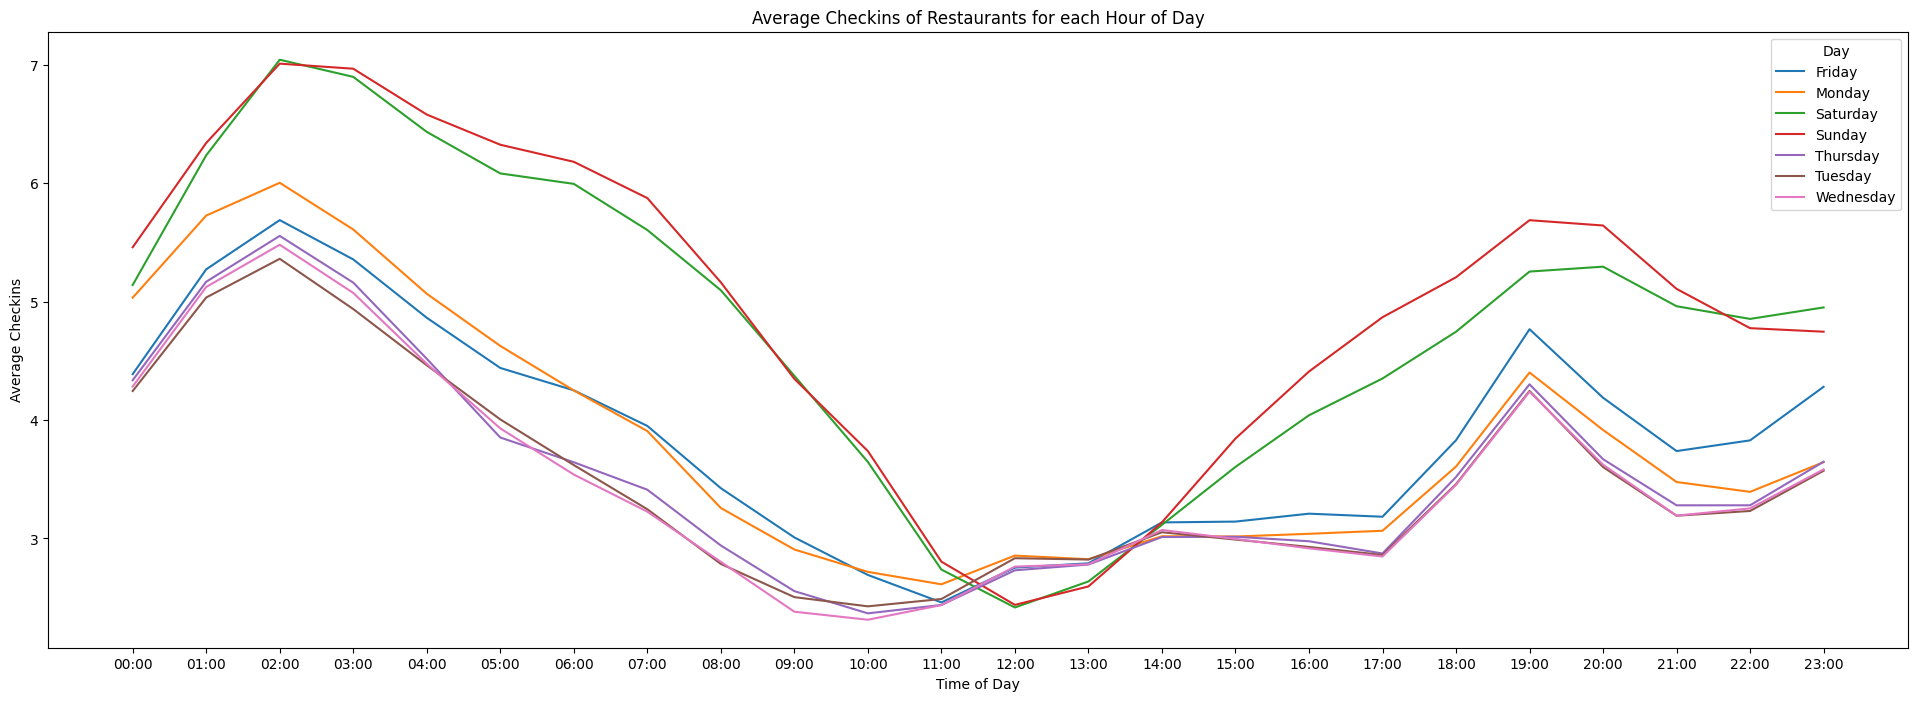

In [ ]:
checkin_subset_df = selected_checkins_df.sort_values(by='Time of Day')
columns_to_select = ['business_id', 'checkins', 'Time of Day', 'Day']
checkin_subset_df = checkin_subset_df[columns_to_select]
plot1_df = checkin_subset_df.groupby(['Day', 'Time of Day'])['checkins'].mean().reset_index()
fig, ax = plt.subplots(figsize=(24, 8))
sns.lineplot(data=plot1_df, x='Time of Day', y='checkins', hue='Day', markers=True, errorbar=None)

ax.set(title='Average Checkins of Restaurants for each Hour of Day', xlabel='Time of Day', ylabel='Average Checkins')

# Now, alter this dataframe to have 3 columns, IN THIS ORDER:
# 'day', 'Time of Day', 'Average Checkins'. Average Checkins is the mean checkins
# for the particular hour of that day.

# Now just plot the graph

Now merge with `checkins2` with `business_cleaned_df` to find the average of checkins each hours of day (`Time of Day`) to visit the American restaurant.

For this part, you will need to clean `business_cleaned_df` to keep stores that are restaurant and category is American (New).

As a reminder, **your second line graph** should contain the following features:
1. The X-axis should be the same as last time
2. The Y-axis should be labelled "Average Checkins".
3. There should be a title called "Average Checkins of American (New) Restaurants for each Hour of Day"
4. There are 7 lines for each of the 7 days

[Text(0.5, 1.0, 'Average Checkins of American (New) Restaurants for each Hour of Day'),
 Text(0.5, 0, 'Time of Day'),
 Text(0, 0.5, 'Average Checkins')]

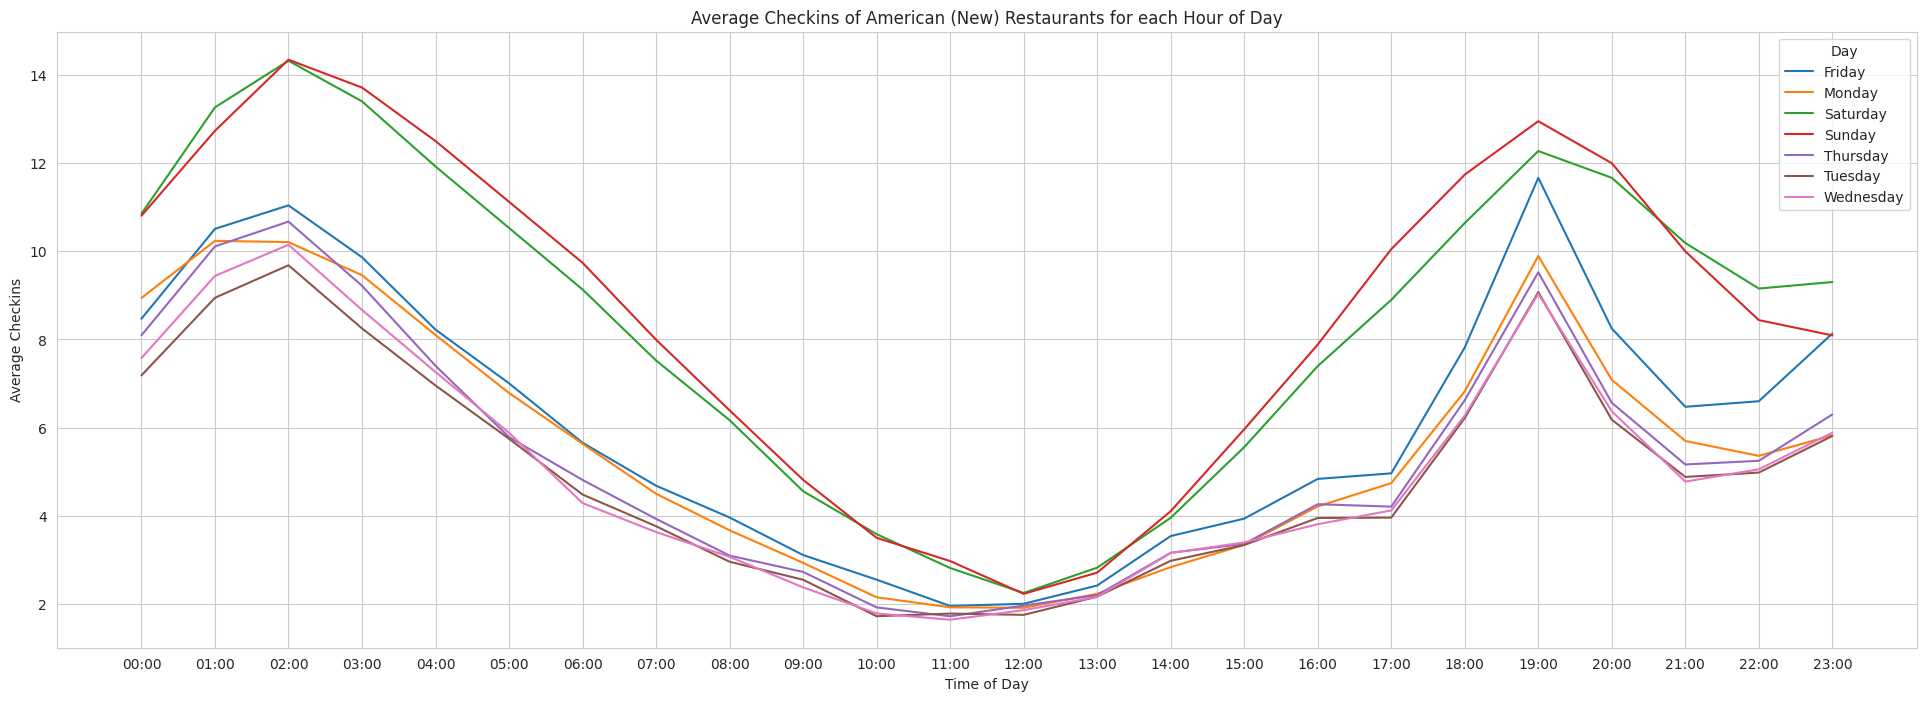

In [ ]:
# Second Plot:

# checkin_subset_df.info()

filtered_business_df = business_cleaned_df[(business_cleaned_df['is_restaurant'] == 1) & (business_cleaned_df['categories'].str.contains(r'American\s*\(New\)', case=False, regex=True))]
filtered_business_df.head()
# Apply the filter for is_restaurant and categories
plot2_df = pd.merge(checkin_subset_df, filtered_business_df, on='business_id', how='inner')

# Group by the 'Hour' and calculate the average number of check-ins.
average_checkins_by_hour = plot2_df.groupby(['Day', 'Time of Day'])['checkins'].mean().reset_index()

# Now 'average_checkins_by_hour' contains the average check-ins for each hour of the day.
average_checkins_by_hour = average_checkins_by_hour.sort_values(by='Time of Day')
# Now, alter this dataframe to have 3 columns, IN THIS ORDER:
# 'day', 'Time of Day', 'Average Duration'. Average Duration is the mean duration time
# for the particular hour of that day.
plot1_df = average_checkins_by_hour.groupby(['Day', 'Time of Day'])['checkins'].mean().reset_index()
fig, ax = plt.subplots(figsize=(24, 8))
sns.lineplot(data=plot1_df, x='Time of Day', y='checkins', hue='Day', markers=True, errorbar=None)

ax.set(title='Average Checkins of American (New) Restaurants for each Hour of Day', xlabel='Time of Day', ylabel='Average Checkins')



## Part 4: Working with Text Data [8 points]

Now, let's switch gears and try to text-based analysis. Textual data is complex, but can also be used to generate extremely interpretable results, making it both valuable and interesting.

Throughout this section, we will attempt to answer the following question:

**According to the `hotels_df` dataframe, what do the reviews for some of the most popular hotels in Europe look like?**

In [ ]:
# loading the dataset
hotels_df = pd.read_csv('hotel_reviews.csv')
hotels_df.rename(columns={'Review_Total_Positive_Word_Counts':'reviews'}, inplace=True)
hotels_df.head()

,Average_Score,Hotel_Name,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,reviews,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score
0,7.7,Hotel Arena,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9
1,7.7,Hotel Arena,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5
2,7.7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1
3,7.7,Hotel Arena,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8
4,7.7,Hotel Arena,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7


###4.1 Tokenizing the text [2 points]

We are going to split the contents of the `reviews` column from `hotels_df` into a list of words. We will use the **nltk** library, which contains an extensive set of tools for text processing. Now, this homework would be interminably long if we went into all the details of nltk. Thus, we are only going to use the following components of the library:
- `nltk.word_tokenize()`: a function used to tokenize text
- `nltk.corpus.stopwords`: a list of commonly used words such as "a", "an","in" that are often ignored in text analysis

Note that for this question, we didn't have to clean the text data first as our original dataset was well-formatted. However, in practice, we would typically clean the text first using regular expressions (regex). Keep this in mind as you work on the project later on in the semester.

**TODO:** Perform the following tasks:
- Use **nltk.corpus.stopwords** to create a set containing the most common English stopwords.
- Implement the function **tokenized_content(content)**, which takes in a string and does the following:
1. Tokenize the text
2. Keep tokens that only contain alphabetic characters (i.e. tokens with no punctuation)
3. Convert each token to lowercase
4. Remove stopwords (commonly used words such as "a", "an", "in")


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# TODO: tokenize and flatten
# (create a tokenized_content function that performs the steps listed above)
from nltk.tokenize import word_tokenize
def tokenized_content(content):
    tokens = word_tokenize(content)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords]
    return tokens

In [ ]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Average_Score                               515738 non-null  float64
 1   Hotel_Name                                  515738 non-null  object 
 2   Negative_Review                             515738 non-null  object 
 3   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 4   Total_Number_of_Reviews                     515738 non-null  int64  
 5   Positive_Review                             515738 non-null  object 
 6   reviews                                     515738 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 8   Reviewer_Score                              515738 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 35.4+ MB


**TODO**: Now perform the following tasks:
- We are interested in reviews for the **most reviewed** hotel in `hotels_df`. Using Counter() to find this hotel is recommended. Store the name of the hotel in the `most_reviewed_hotel` variable, and use it to create `hotel_reviews_df`, a subset of `hotels_df` only containing instances from the hotel in question
- From there, extract the `Positive_Review` column of `hotels_reviews_df` as a list called `reviews`.
- Apply your `tokenize_content()` function to each item in the list `reviews`. Call the resultant list `top_tokens_list`.
- Flatten the list `top_tokens_list`, and call the resultant list `top_tokens`. The autograder will be examining the contents of this list. (Flatten using list comprehension)

For futher assistance, here is the documentation for Counter() objects:

https://docs.python.org/2/library/collections.html#counter-objects

In [ ]:
from collections import Counter
# TODO: Find the most reviewed hotel, use that to make hotel_reviews_df,
#       extract the reviews, use your function to make the token list, and flatten it

hotel_counter = Counter(hotels_df['Hotel_Name'])
most_reviewed_hotel = hotel_counter.most_common(1)[0][0]
hotel_reviews_df = hotels_df[hotels_df['Hotel_Name'] == most_reviewed_hotel]
hotel_reviews_df.head()

reviews = hotel_reviews_df['Positive_Review'].tolist()
top_tokens_list = [tokenized_content(review) for review in reviews]
top_tokens = [token for tokens in top_tokens_list for token in tokens]

In [ ]:
# 2 points
grader.grade(test_case_id = 'test_top_tokens', answer = top_tokens)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.



### 4.2 Most Frequent Words [2 points]
**TODO**: Now, find the 10 most common words amongst the content of `top_tokens`. Return this as a list of `(word, count)` tuples called `top_most_common`, in descending order of `count`.

**Hint**: We again recommend using `Counter` in this question.

In [ ]:
# TODO: Get top_most_common
word_counts = Counter(top_tokens)

# Find the 10 most common words in descending order of count
top_most_common = word_counts.most_common(10)

In [ ]:
# 2 points
grader.grade(test_case_id = 'test_top_most_common', answer = top_most_common)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 4.3 Word Clouds [4 points - manually graded]

Before we move on from this dataset, let's visualize our results using a word cloud.

**TODO**: Create a word cloud containing all the words in the list `top_tokens` (created in part 4.1). [The WordCloud documentation](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) contains instructions on how to do this.

*Please make sure your wordcloud has a **lavender** background.*

We will be going through your notebooks and **manually grading** your word cloud. This is worth 4 points.

In [ ]:
# TODO: Generate your Word Cloud, making sure it meets the requirements above
text = ' '.join(top_tokens)

# Create a WordCloud object
wordcloud = WordCloud(background_color='lavender').generate(text)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top Tokens')
plt.show()

NameError: ignored

# HW Submission

<br>
<center><img src = "https://i.imgflip.com/79knab.jpg" width= "500" align ="center"/></center>
<br>

Congratulations on finishing this homework! The good news is that similar to HW1, you basically know your score when you submit to Gradescope.
However, this time, we will be manually grading your lineplots and wordclouds, so the autograder score is not final! Remember that we will also be checking for plagiarism, so please make sure to cite your sources (if any) by commenting the urls / links you looked at.

Before you submit on Gradescope (you must submit your notebook to receive credit):

1.   Please rerun your notebook on Colab by clicking "Restart and Run-All", and make sure there is nothing wrong with your notebook.
2.   **Double check that you have the correct PennID (all numbers) saved in the autograder**.
3. Make sure you've run all the PennGrader cells and have received a score.
4. Go to the "File" tab at the top left, and click "Download .ipynb" + "Download .py". Please name the `.ipynb` and `.py` files **"homework2.ipynb"** and **"homework2.py"** respectively. Then, upload both the `.py` and `.ipynb` files to Gradescope.

###Be sure to name your files correctly!!!

**Please let the course staff know ASAP if you have any issues submitting.**